In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df['X'] = df['3.159499363321345566e-02'].rename('X')

In [5]:
df['Y'] = df['9.869877579082642072e-01'].rename('Y')

In [6]:
df['class'] = df['0.000000000000000000e+00'].rename('class')

In [7]:
df.drop(columns=['9.869877579082642072e-01','0.000000000000000000e+00','3.159499363321345566e-02'],axis=1,inplace=True)

In [8]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


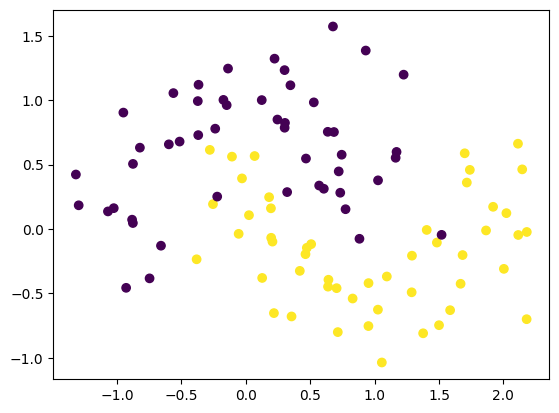

In [9]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [10]:
X = df.drop(columns=['class'],axis=1)
y = df['class']

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

2025-05-23 17:50:11.895624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748022611.906958   33853 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748022611.910502   33853 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748022611.920241   33853 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748022611.920254   33853 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748022611.920256   33853 computation_placer.cc:177] computation placer alr

In [12]:
# model = Sequential()
# model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
# model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
# model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
# model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
# model.add(Dense(1,activation='sigmoid'))

model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

/home/zahir/Tf_gpu/tfgpu1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748022613.566304   33853 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.get_weights()

[array([[ 0.03495193,  1.6406444 ,  0.7497076 ,  1.2834693 ,  1.3255249 ,
         -1.297931  ,  0.20788884,  1.263224  ,  0.613814  , -0.5078356 ],
        [ 1.2105125 , -1.5548935 ,  1.4871794 , -0.5216336 , -1.3941693 ,
          0.9260043 , -0.80282295,  0.05823088, -0.5841911 , -1.2625339 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.03458214,  0.63353264,  0.48304498, -0.18413454, -0.13795578,
         -0.6560979 , -0.06703895,  0.08968532, -0.27194756, -0.15197152],
        [-0.37066695,  0.05775869,  0.0758599 ,  0.60642314,  0.67490613,
          0.33171797,  0.2301985 ,  0.2894634 , -0.44701424, -0.25810075],
        [-0.35723126, -0.01547343, -0.03792274, -0.6119343 , -0.5884168 ,
          0.37120414,  0.55506134,  0.69975173,  0.56649446, -0.3070163 ],
        [ 0.19517887, -0.08420295,  0.6287781 ,  0.15867442, -0.03580892,
         -0.46618125,  0.71384585, -0.42153198, -0.4234157 , -0.05678207],
        [ 0.49669

In [15]:
initial_weights = model.get_weights()

In [16]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [17]:
model.set_weights(initial_weights)

In [18]:
model.get_weights()

[array([[ 0.1493989 ,  0.36005467,  0.39080322, -0.32694283,  0.37551504,
          1.4112453 , -0.3343752 , -1.2520754 ,  0.41432574,  0.32182467],
        [-0.173885  ,  0.24854177,  0.45530844, -0.83149254,  0.58353585,
         -1.1328013 , -0.07959965, -1.2904195 ,  1.192441  , -1.2342215 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.03289412,  0.08815349,  0.26189297, -0.23205142, -0.3782341 ,
          0.4537739 ,  0.26760766, -0.34417057,  0.22020908, -0.25024492],
        [-0.27177644,  0.7442141 ,  0.1707425 ,  0.10024872, -0.08344833,
         -0.46549392,  0.39463964, -0.04989217,  0.48019776, -0.05729683],
        [-0.49985397,  0.11614636, -0.3617529 ,  0.00830165,  0.2097497 ,
         -0.48203978,  0.32685924, -0.27530384, -0.29176015, -0.6745327 ],
        [-0.06262433,  0.04380925, -0.13895063, -0.46384   ,  0.23291753,
          0.25794688, -0.06929929, -0.3370127 , -0.26298732, -0.03923957],
        [-0.09278

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100


I0000 00:00:1748022615.078143   33921 service.cc:152] XLA service 0x7fd7740063a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748022615.078181   33921 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-05-23 17:50:15.100104: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748022615.258394   33921 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.4375 - loss: 0.6907

I0000 00:00:1748022615.883329   33921 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 609ms/step - accuracy: 0.4773 - loss: 0.6873 - val_accuracy: 0.5000 - val_loss: 0.6823
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4890 - loss: 0.6844 - val_accuracy: 0.5000 - val_loss: 0.6802
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4851 - loss: 0.6830 - val_accuracy: 0.5500 - val_loss: 0.6779
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4836 - loss: 0.6829 - val_accuracy: 0.5500 - val_loss: 0.6754
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4993 - loss: 0.6796 - val_accuracy: 0.5500 - val_loss: 0.6729
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4993 - loss: 0.6760 - val_accuracy: 0.5500 - val_loss: 0.6701
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5432 - loss: 0.6728 - val_accuracy: 0.5500 - val_loss: 0.6672
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5597 - loss: 0.6714 - val_accuracy: 0.6000 - val_loss: 0.6641
Epo

In [21]:
model.get_weights()

[array([[ 0.0755046 ,  0.49866116,  0.45329756, -0.51597416,  0.25404197,
          1.4428159 , -0.6174817 , -1.5489055 ,  0.29683107,  0.41751176],
        [-0.18478264,  0.00553376,  0.304704  , -0.672976  ,  0.77102864,
         -1.2603445 , -0.02138556, -1.0040164 ,  1.3694279 , -1.4028063 ]],
       dtype=float32),
 array([ 0.0680949 , -0.19578323, -0.14617173, -0.07857466,  0.05138868,
        -0.1594846 , -0.02659007,  0.0602049 ,  0.08456567,  0.14363317],
       dtype=float32),
 array([[ 0.05461452,  0.30315593,  0.04360377, -0.23205142, -0.45136136,
          0.31167075,  0.13566534, -0.3477978 ,  0.14204241, -0.25024492],
        [-0.15361793,  0.9298911 , -0.0112577 ,  0.10024872, -0.10788069,
         -0.5346473 ,  0.37586153, -0.04989217,  0.38968682, -0.05729683],
        [-0.37542564,  0.20845605, -0.5393574 ,  0.00830165,  0.2702432 ,
         -0.4541466 ,  0.39386848, -0.27530384, -0.361627  , -0.6745327 ],
        [-0.08046558, -0.0461628 , -0.01997126, -0.46384   , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 949us/step


<Axes: >

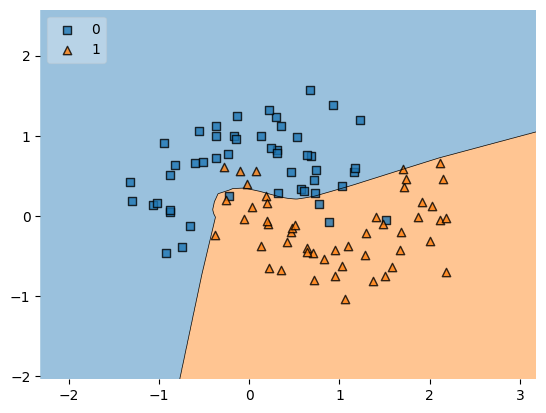

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X.values, y=y.values.astype(int), clf=model, legend=2)